In [2]:
from pytao import Tao
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [3]:
# in tao.init I turned off plotting via global%plot_on so no pop-up window appears
# can turn back in tao.init on for debugging
init = '-lat ltb.bmad'
tao=Tao('-init tao.init')
#tao=Tao('-lat ltb.bmad')

# locations of all simulated BPMs
bpmh_s = tao.lat_list('BPMH*', 'ele.s')
bpmv_s = tao.lat_list('BPMV*', 'ele.s')
bpmh_s, bpmv_s

(array([23.89076, 26.48446, 38.25626, 42.04156, 45.64456, 49.24146,
        51.36026]),
 array([23.65581, 26.24951, 38.02131, 41.80661, 45.40961, 49.00651,
        51.12531]))

In [21]:
tao.cmd('show var')

['       Name                                      Using for Optimization',
 '    correctors_x[1:6]                            1:6',
 '    correctors_y[1:7]                            1:7']

In [5]:
tao.cmd('show var correctors_x')

['  Variable                   Slave Parameters           Meas         Model        Design  Useit_opt',
 '  correctors_x[1]            HK9[KICK]              0.0000E+00    0.0000E+00    0.0000E+00       T',
 '  correctors_x[2]            HK16[KICK]             0.0000E+00    0.0000E+00    0.0000E+00       T',
 '  correctors_x[3]            DH015[KICK]            0.0000E+00   -0.0000E+00   -0.0000E+00       T',
 '  correctors_x[4]            DH076[KICK]            0.0000E+00   -0.0000E+00   -0.0000E+00       T',
 '  correctors_x[5]            DH088[KICK]            0.0000E+00   -0.0000E+00   -0.0000E+00       T',
 '  correctors_x[6]            DH115[KICK]            0.0000E+00   -0.0000E+00   -0.0000E+00       T',
 '  Variable                   Slave Parameters           Meas         Model        Design  Useit_opt']

In [23]:
# change corrector kicks like this:
tao.cmd('set var correctors_x[1]|model = 0.01')
tao.cmd('scale all') # just here to scale plots

[]

In [24]:
tao.cmd('show data')

['',
 '  Name                                 Using for Optimization',
 '  orbit.x[1:14]                                  Using:',
 '  orbit.y[1:14]                                  Using:',
 '  emittance.x[1:3]                               Using:',
 '  emittance.y[1:3]                               Using:']

In [4]:
data = tao.cmd('show data orbit.x') # orbit at all BPMs
data_list = []
for row in data:
  if "orbit.x" in row and "BPMH" in row:
    data_list.append(row.split())
data_list

[['2',
  'orbit.x',
  '<target>',
  'BPMH019',
  '0.0000000E+00',
  '5.4029337E-03',
  '5.4029337E-03',
  'F',
  'F'],
 ['4',
  'orbit.x',
  '<target>',
  'BPMH027',
  '0.0000000E+00',
  '9.2073910E-03',
  '9.2073910E-03',
  'F',
  'F'],
 ['6',
  'orbit.x',
  '<target>',
  'BPMH066',
  '0.0000000E+00',
  '-6.7243092E-03',
  '-6.7243092E-03',
  'F',
  'F'],
 ['8',
  'orbit.x',
  '<target>',
  'BPMH078',
  '0.0000000E+00',
  '-1.3349761E-02',
  '-1.3349761E-02',
  'F',
  'F'],
 ['10',
  'orbit.x',
  '<target>',
  'BPMH090',
  '0.0000000E+00',
  '-1.8234820E-02',
  '-1.8234820E-02',
  'F',
  'F'],
 ['12',
  'orbit.x',
  '<target>',
  'BPMH102',
  '0.0000000E+00',
  '-3.0211920E-02',
  '-3.0211920E-02',
  'F',
  'F'],
 ['14',
  'orbit.x',
  '<target>',
  'BPMH109',
  '0.0000000E+00',
  '-1.7501770E-02',
  '-1.7501770E-02',
  'F',
  'F']]

In [8]:
# how I extract orbit data values
llx = tao.cmd('python data_d_array 1@orbit.x')
xl = np.array([float(line.split()[2].replace(';','')) for line in llx])
xl

array([-0.09340593, -0.0869785 , -0.06705592, -0.06338006,  0.04657784,
        0.04629218,  0.04207848,  0.04179292,  0.0287046 ,  0.02791874,
        0.02049528,  0.02063981,  0.00895728,  0.00638502])

## we need info on the initial beam to do emittance simulation, now we are only tracking a single particle so no emittance is calculated 

In [11]:
tao.cmd('show data emittance.x')

['Data name: emittance.x',
 '                                                                                                       |   Useit',
 '                        Ref_Ele   Start_Ele   Ele                 Meas           Model          Design | Opt  Plot',
 '    1  emit.x <target>                        MW000      0.0000000E+00   0.0000000E+00   0.0000000E+00     F     F',
 '    2  emit.x <target>                        MW035      0.0000000E+00   0.0000000E+00   0.0000000E+00     F     F',
 '    3  emit.x <target>                        MW107      0.0000000E+00   0.0000000E+00   0.0000000E+00     F     F',
 '                        Ref_Ele   Start_Ele   Ele                 Meas           Model          Design | Opt  Plot',
 '                                                                                                       |   Useit']

## Plot stuff in notebook

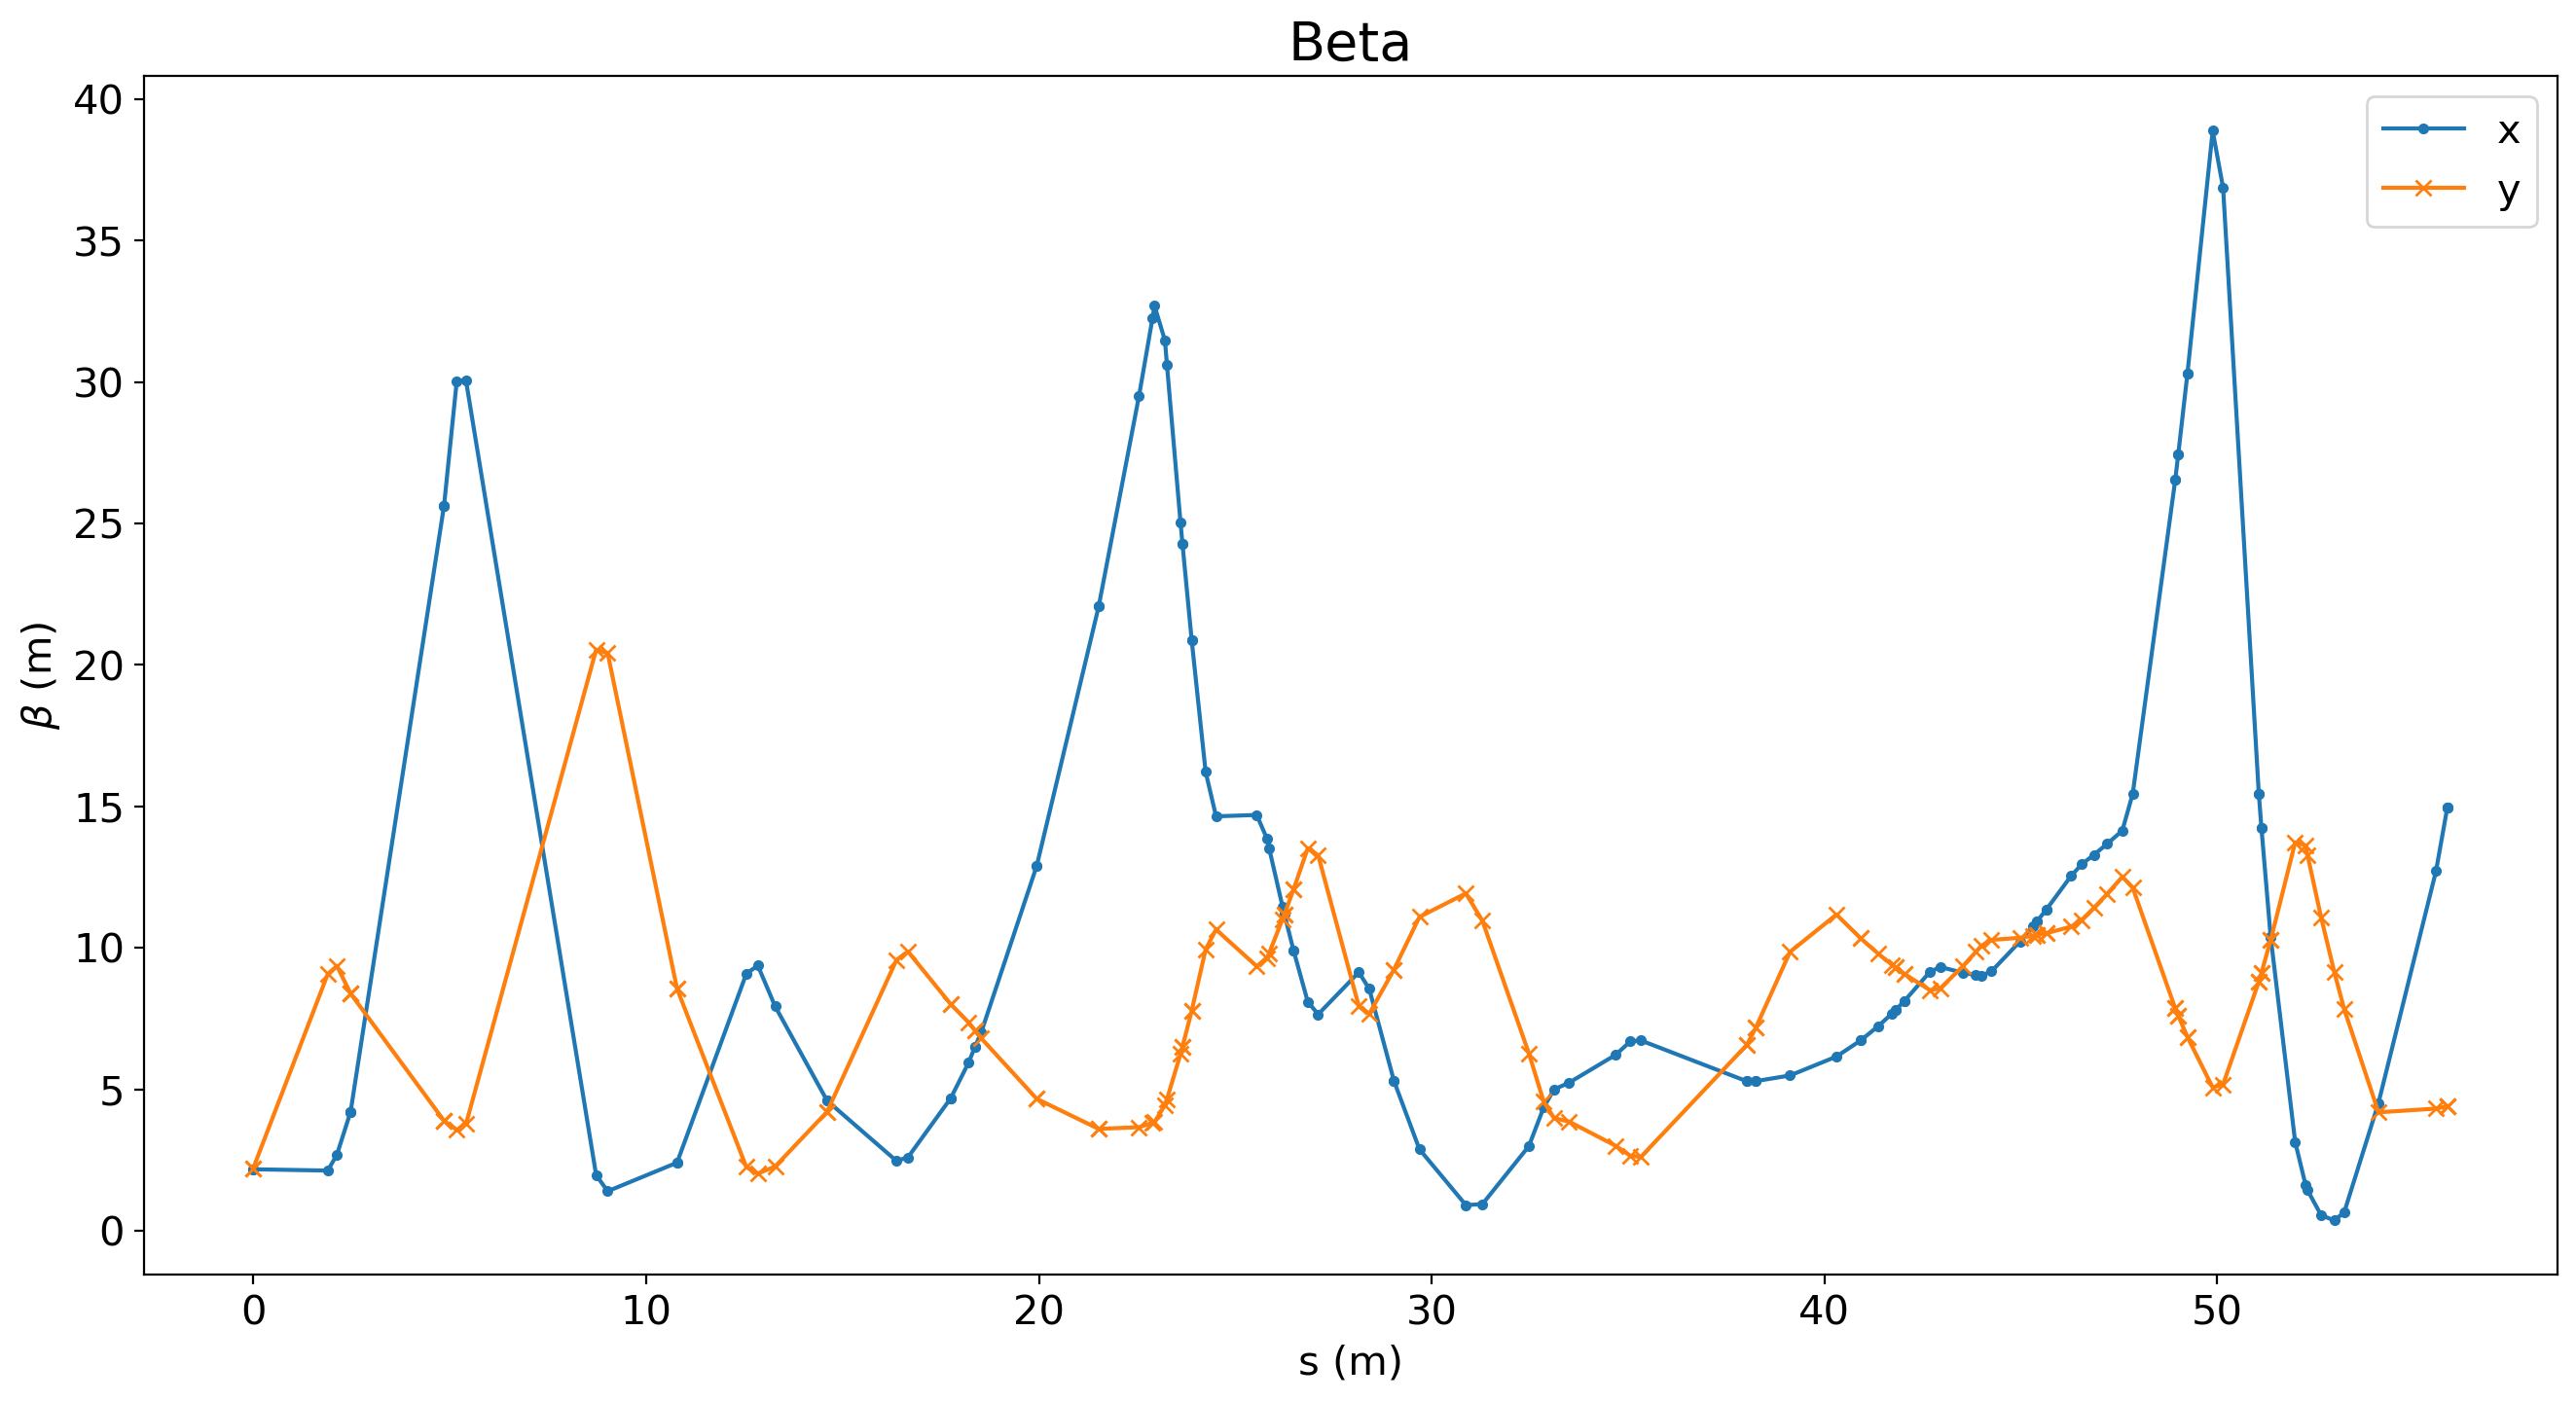

In [12]:
plt.figure(figsize=(16,8))
plt.title('Beta',fontsize=20)
plt.xlabel('s (m)',fontsize=15)
plt.ylabel(r'$\beta$ (m)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'ele.a.beta'),'.-',label='x')
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'ele.b.beta'),'x-',label='y')
plt.legend(fontsize=15);

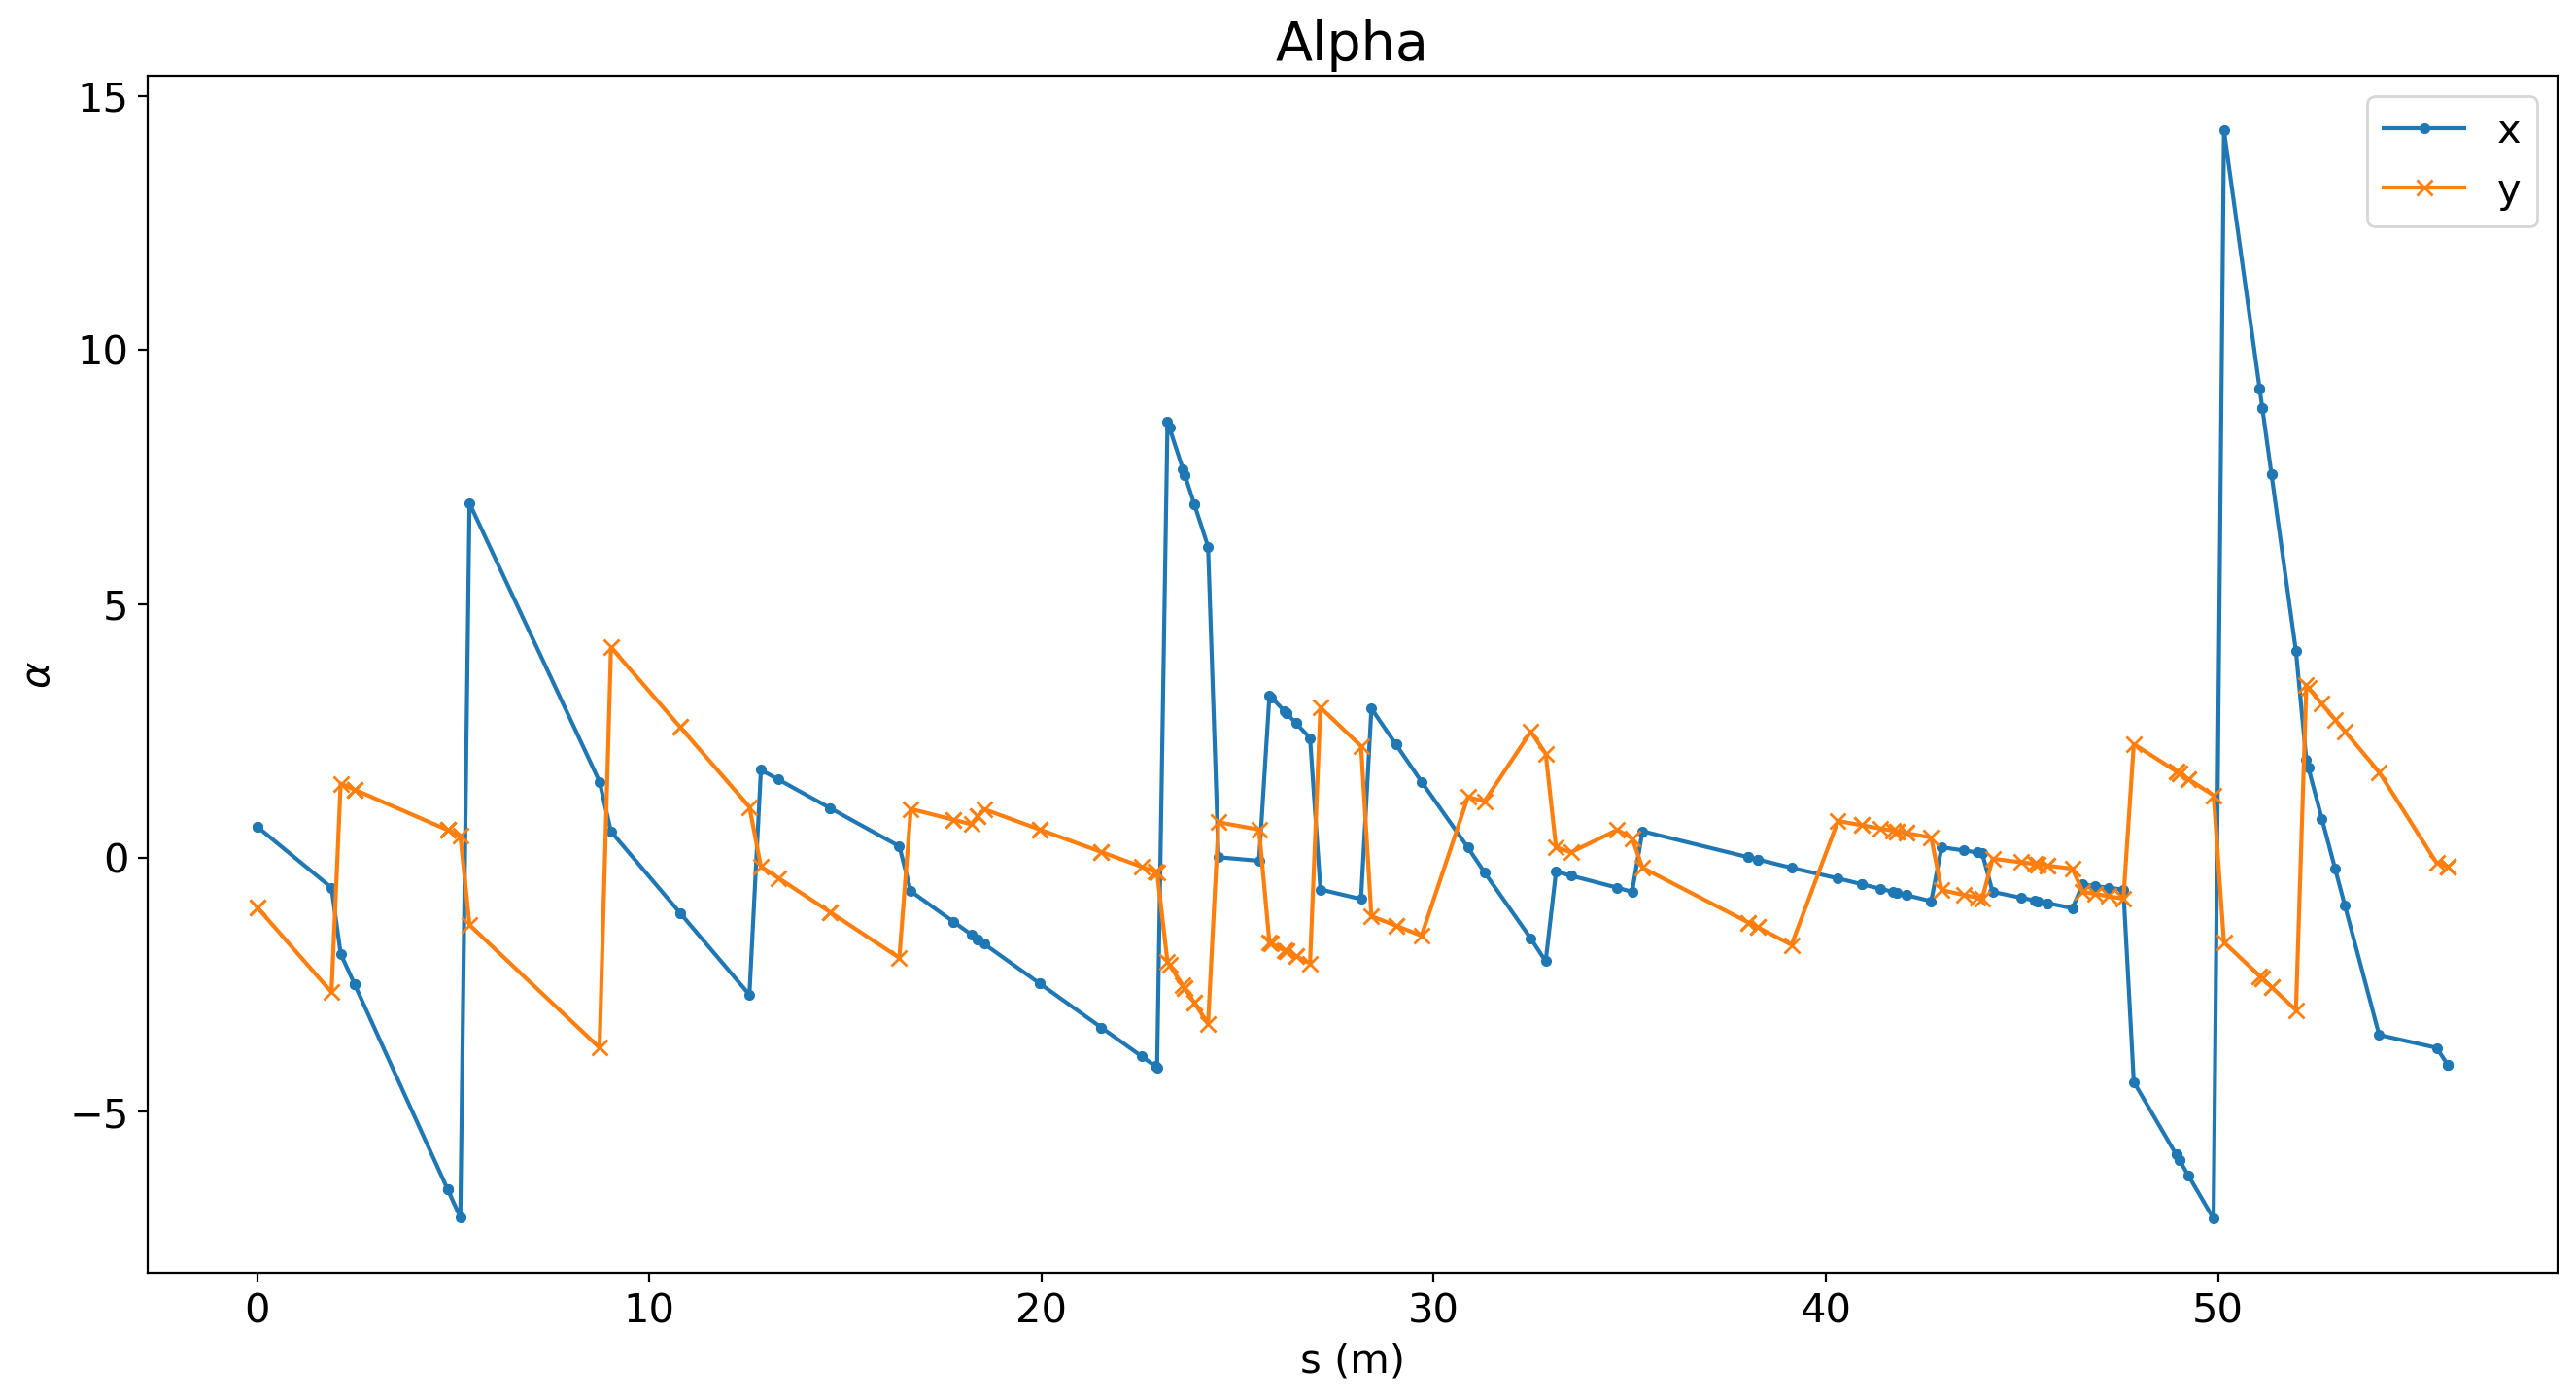

In [13]:
plt.figure(figsize=(16,8))
plt.title('Alpha',fontsize=20)
plt.xlabel('s (m)',fontsize=15)
plt.ylabel(r'$\alpha$',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'ele.a.alpha'),'.-',label='x')
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'ele.b.alpha'),'x-',label='y')
plt.legend(fontsize=15);

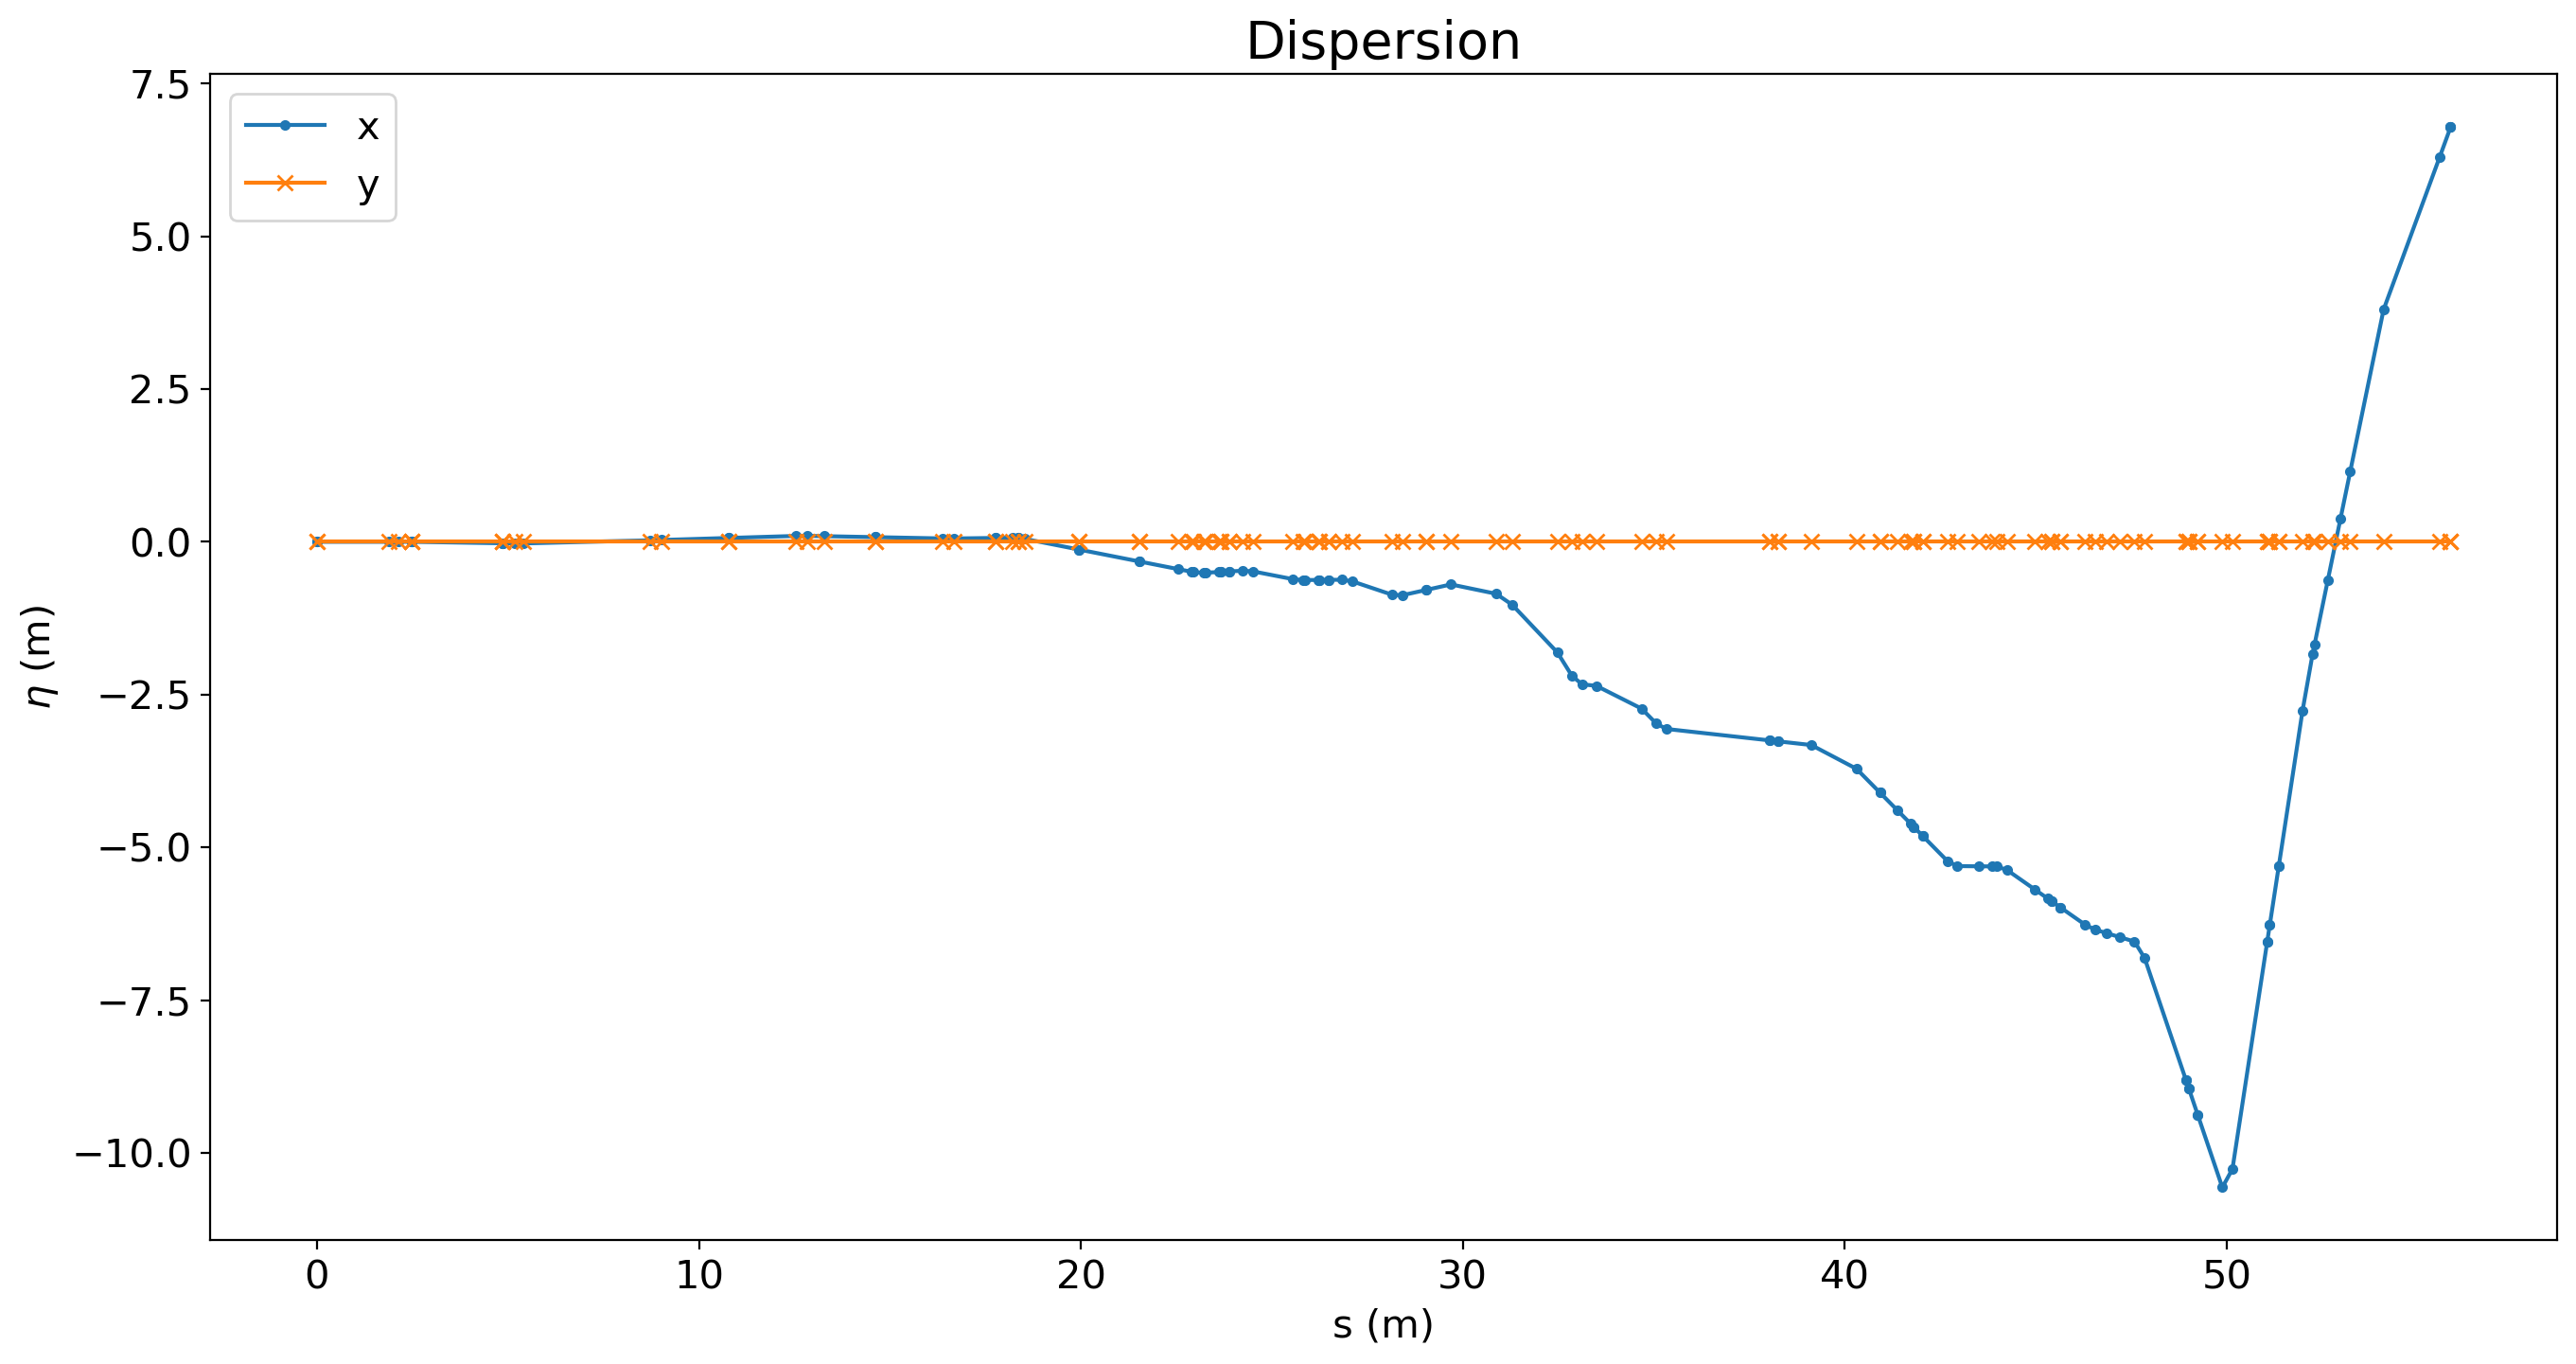

In [14]:
plt.figure(figsize=(16,8))
plt.title('Dispersion',fontsize=20)
plt.xlabel('s (m)',fontsize=15)
plt.ylabel(r'$\eta$ (m)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'ele.a.eta'),'.-',label='x')
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'ele.b.eta'),'x-',label='y')
plt.legend(fontsize=15);

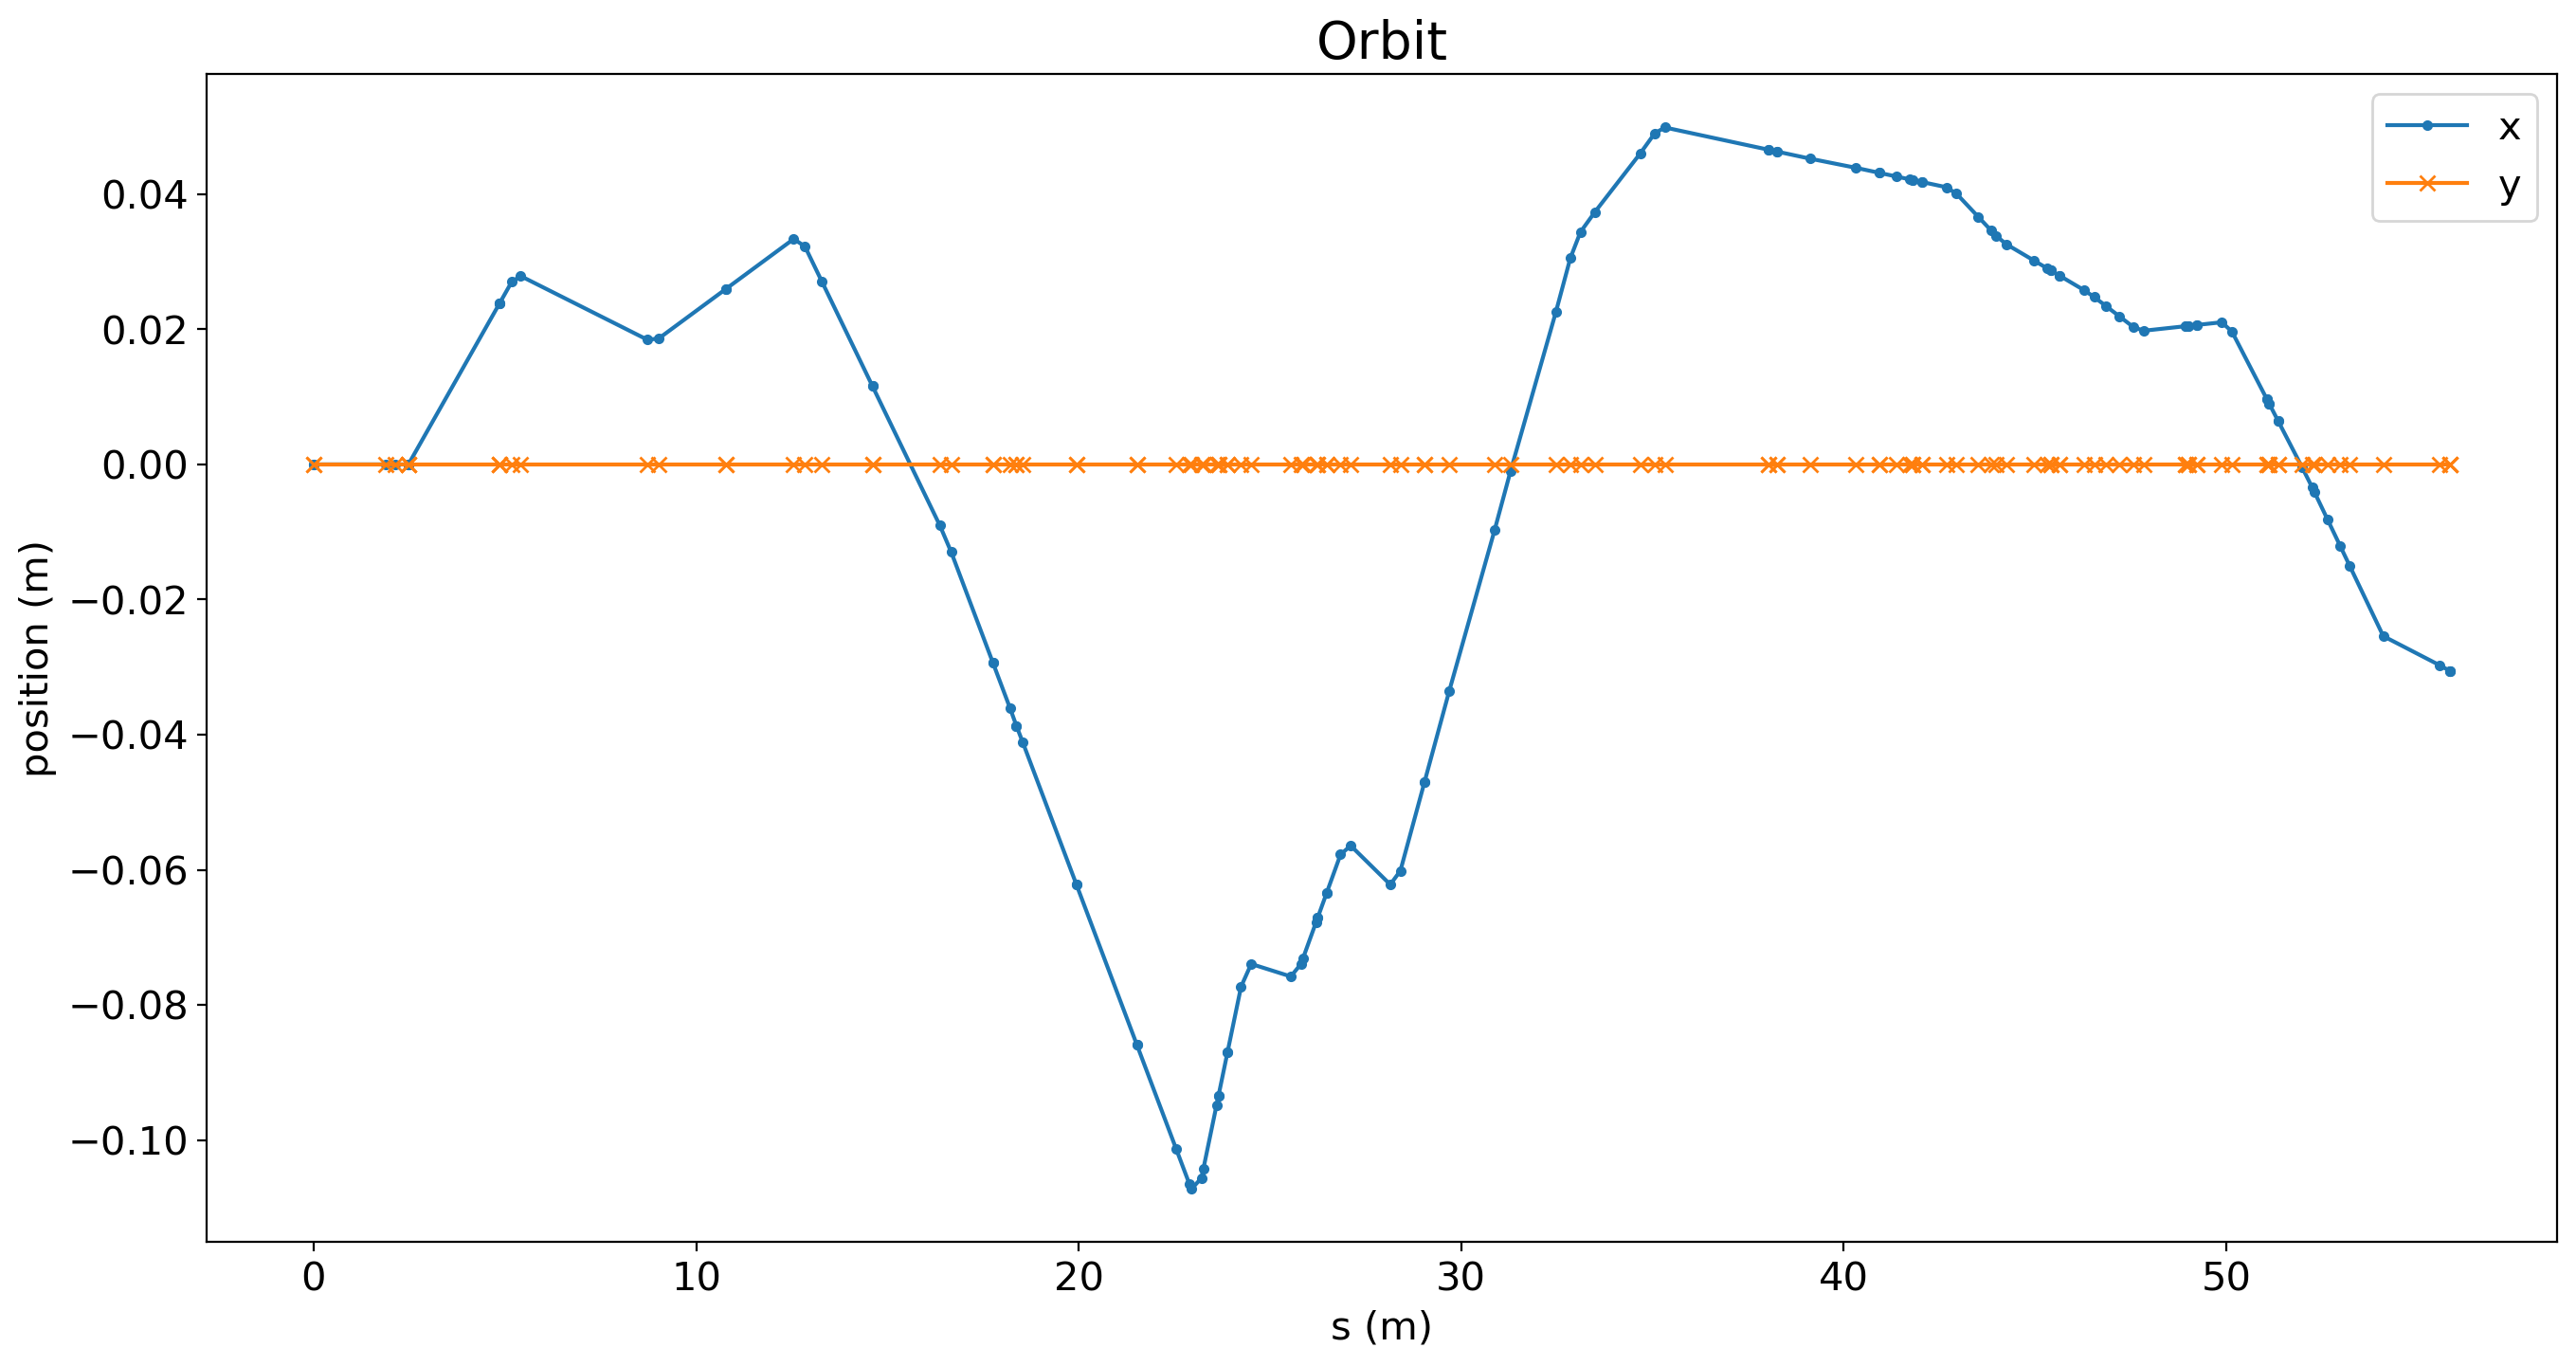

In [15]:
plt.figure(figsize=(16,8))
plt.title('Orbit',fontsize=20)
plt.xlabel('s (m)',fontsize=15)
plt.ylabel('position (m)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'orbit.vec.1'),'.-',label='x')
plt.plot(tao.lat_list('*', 'ele.s'),tao.lat_list('*', 'orbit.vec.3'),'x-',label='y')
plt.legend(fontsize=15);

## Function that takes corrector settings and outputs orbit

In [16]:
def get_orbit(cor_h_in,cor_v_in):

    # run tao
    init = '-lat ltb.bmad'
    tao=Tao(init)
   
    # cor_in are shape (6,) and (7,) for six horizontal correctors and seven vertical correctors
    for i in range(6):
        tao.cmd('set var correctors_x['+str(i+1)+']|model = '+str(cor_h_in[i]))
    for i in range(7):
        tao.cmd('set var correctors_y['+str(i+1)+']|model = '+str(cor_v_in[i]))

    # orbit at BPM in meter
    x = tao.lat_list('BPMH*', 'orbit.vec.1') # shape (7,)
    y = tao.lat_list('BPMV*', 'orbit.vec.3') # shape (7,)

    del tao
    return x,y

In [17]:
cor_h = np.random.uniform(-0.005,0.005,6)
cor_v = np.random.uniform(-0.005,0.005,7)

In [18]:
x,y = get_orbit(cor_h,cor_v)

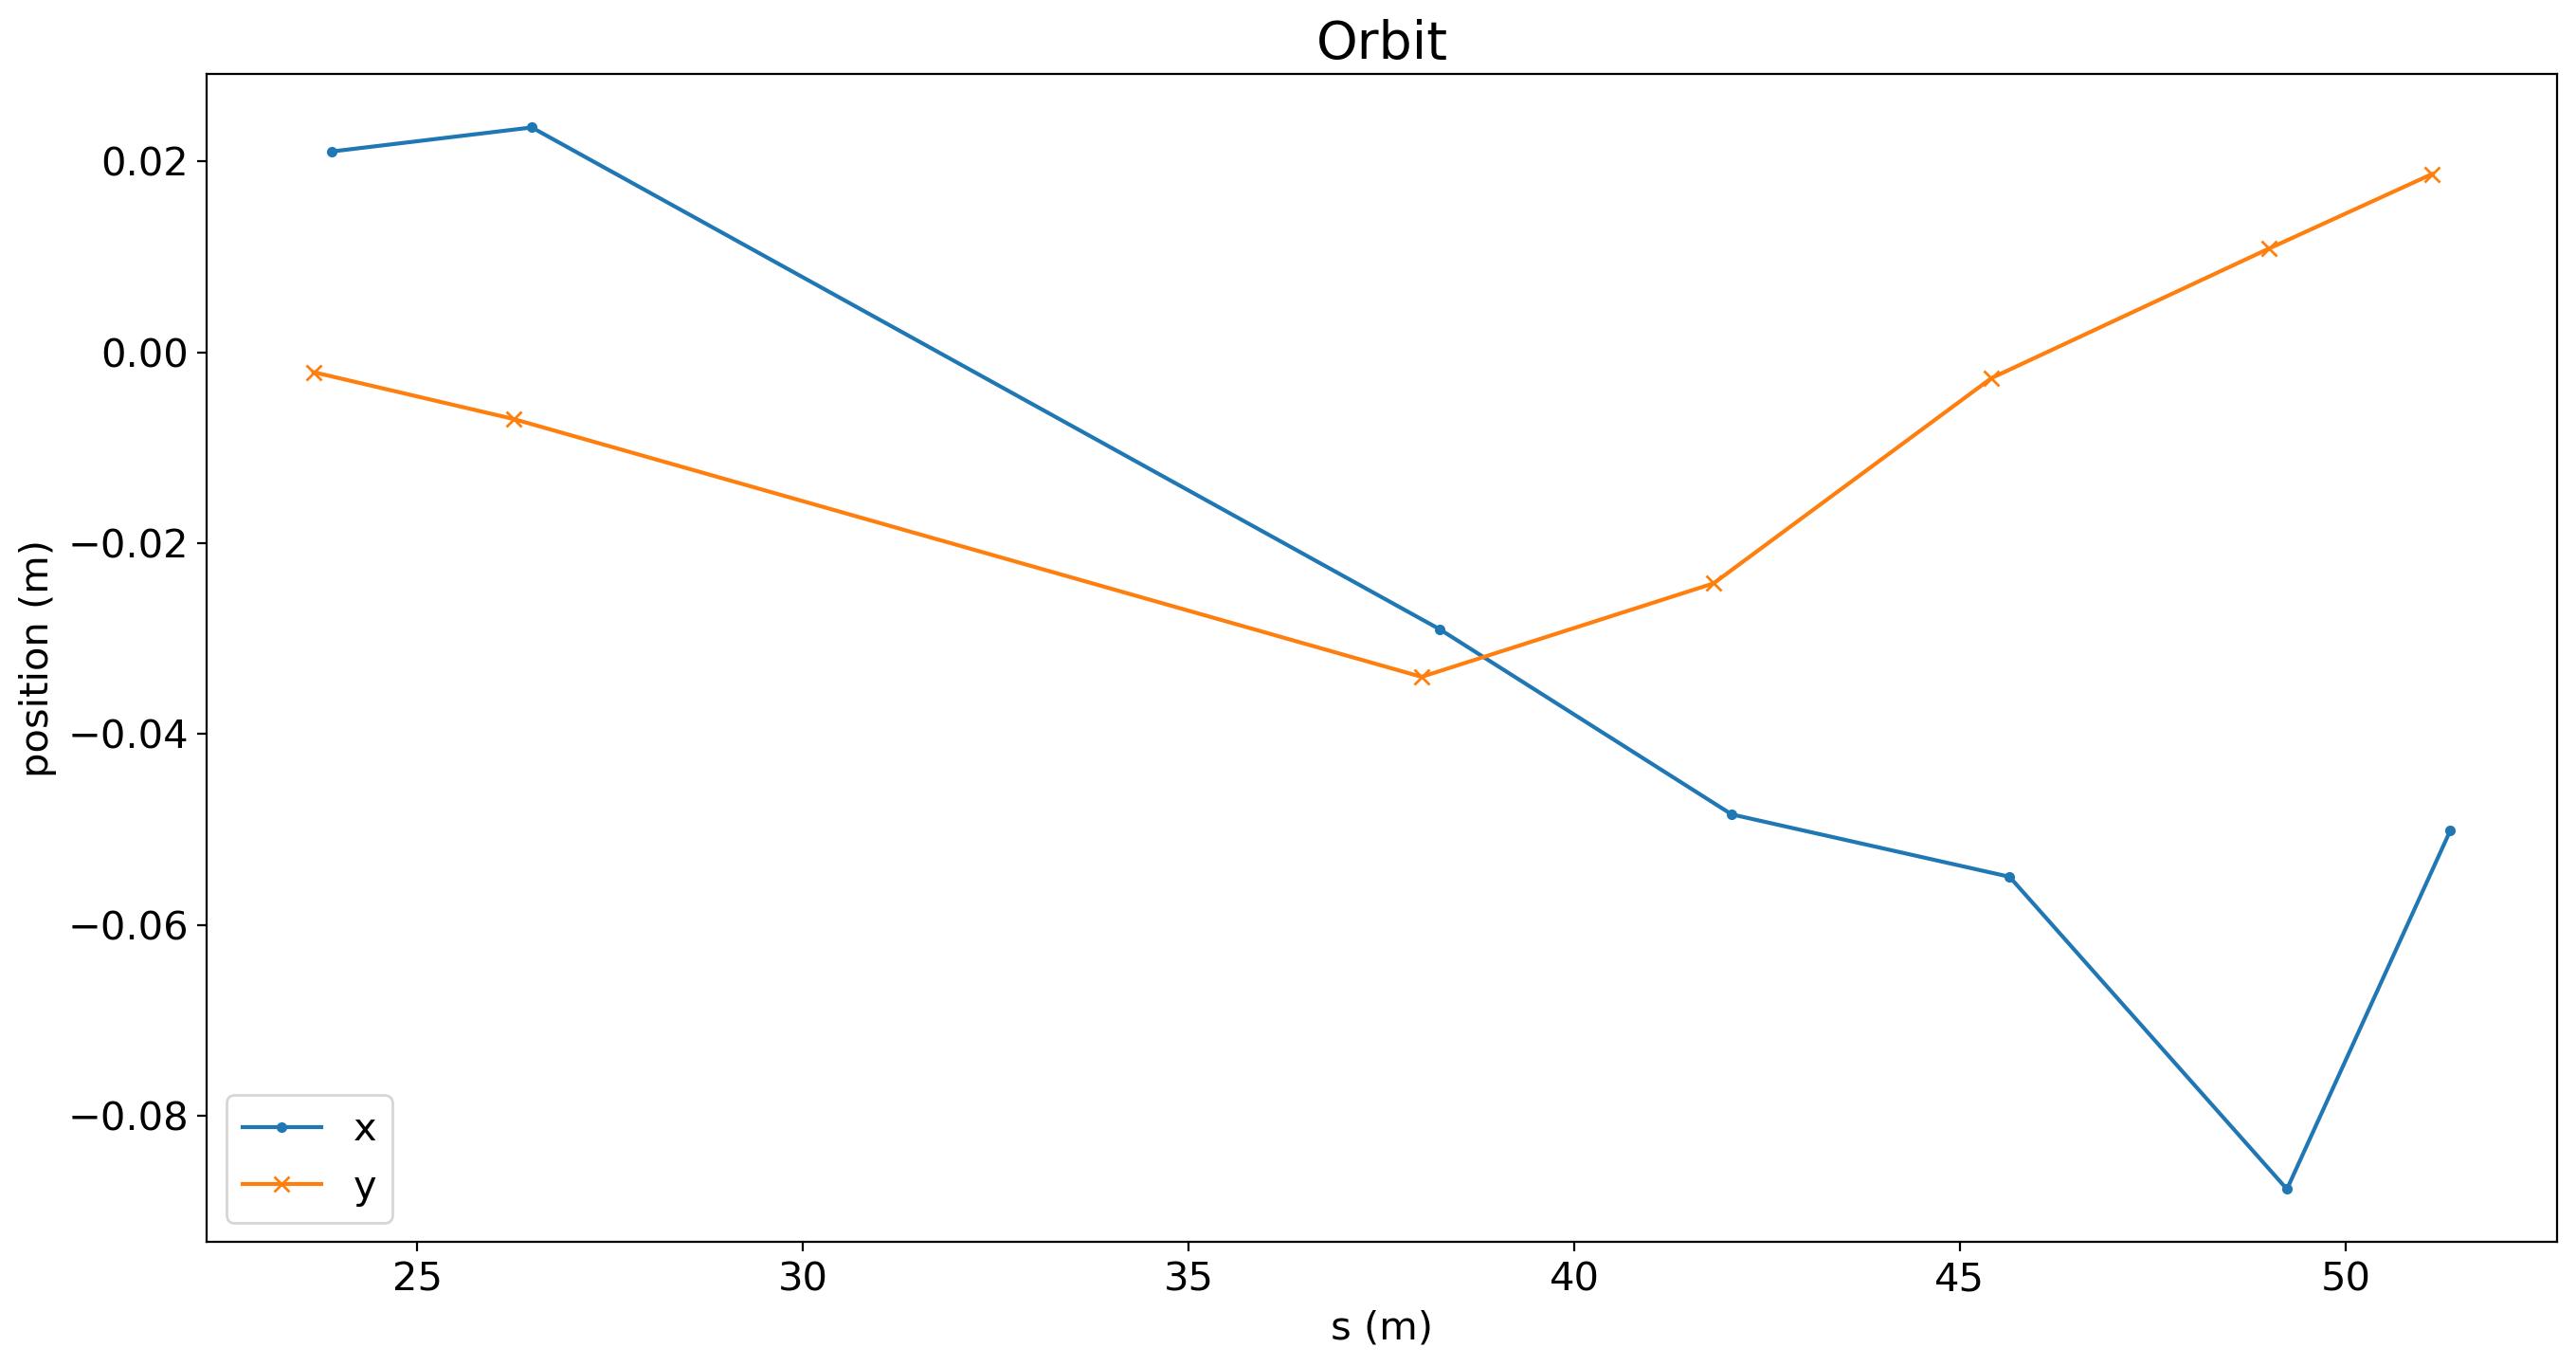

In [19]:
plt.figure(figsize=(16,8))
plt.title('Orbit',fontsize=20)
plt.xlabel('s (m)',fontsize=15)
plt.ylabel('position (m)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(bpmh_s,x,'.-',label='x')
plt.plot(bpmv_s,y,'x-',label='y')
plt.legend(fontsize=15);